In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/kaggle/input/fashion-product-images-small/styles.csv',on_bad_lines = "skip")

df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [3]:
df = df.dropna()
df.nunique()
df.columns


Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')

In [4]:
len(df)


44077

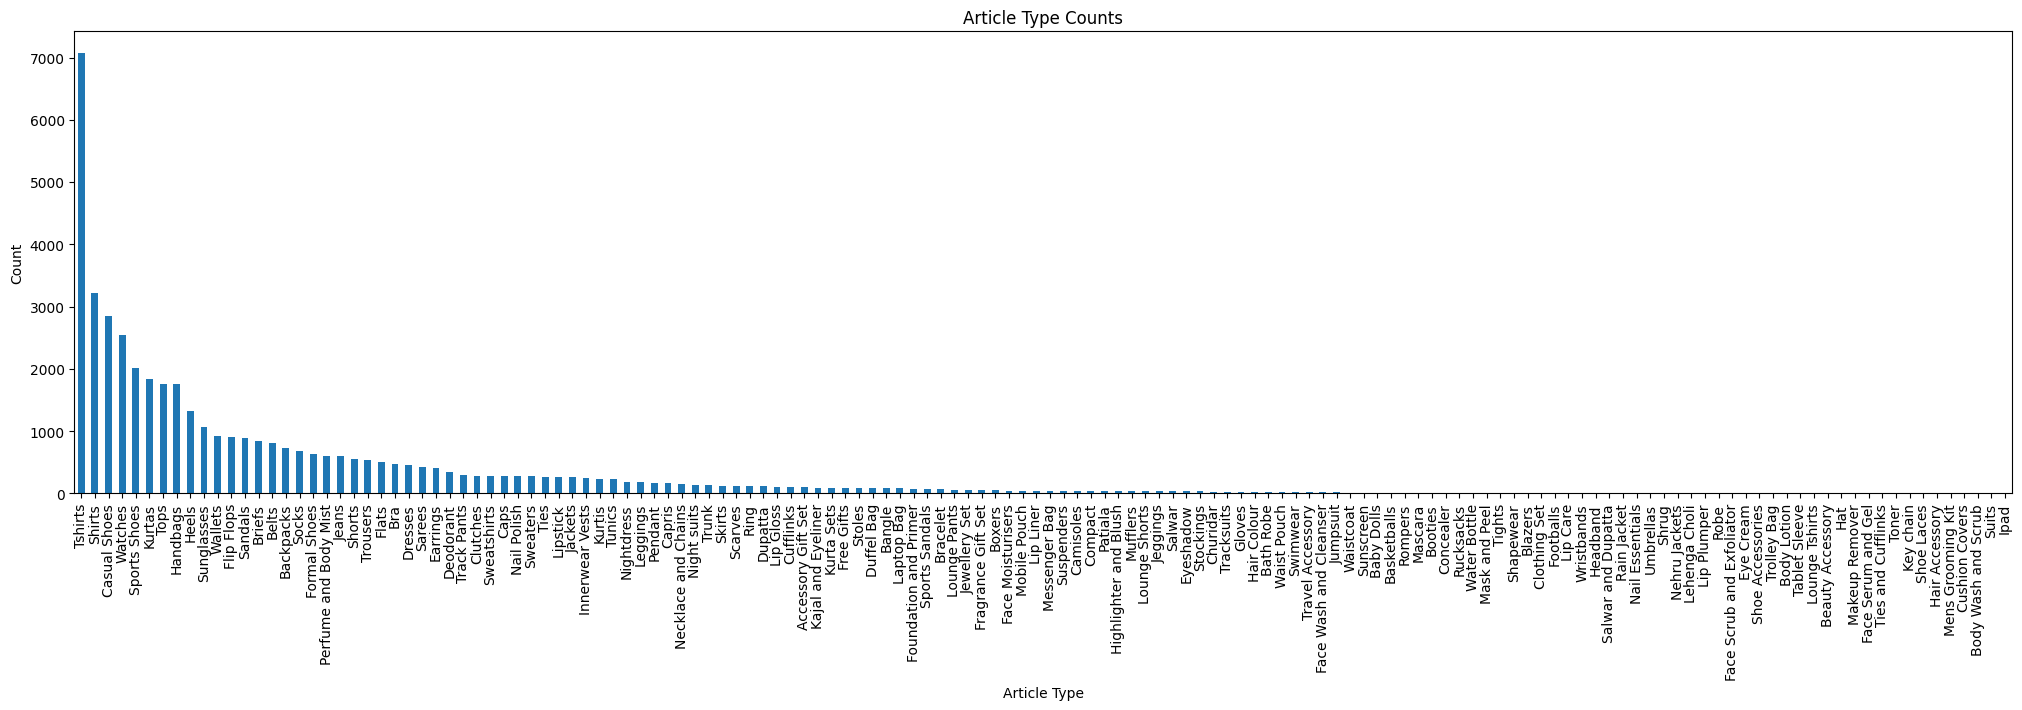

In [5]:
type_counts = df['articleType'].value_counts()

plt.figure(figsize=(25, 6))
type_counts.plot(kind='bar')
plt.title('Article Type Counts')
plt.xlabel('Article Type')
plt.ylabel('Count')
plt.show()

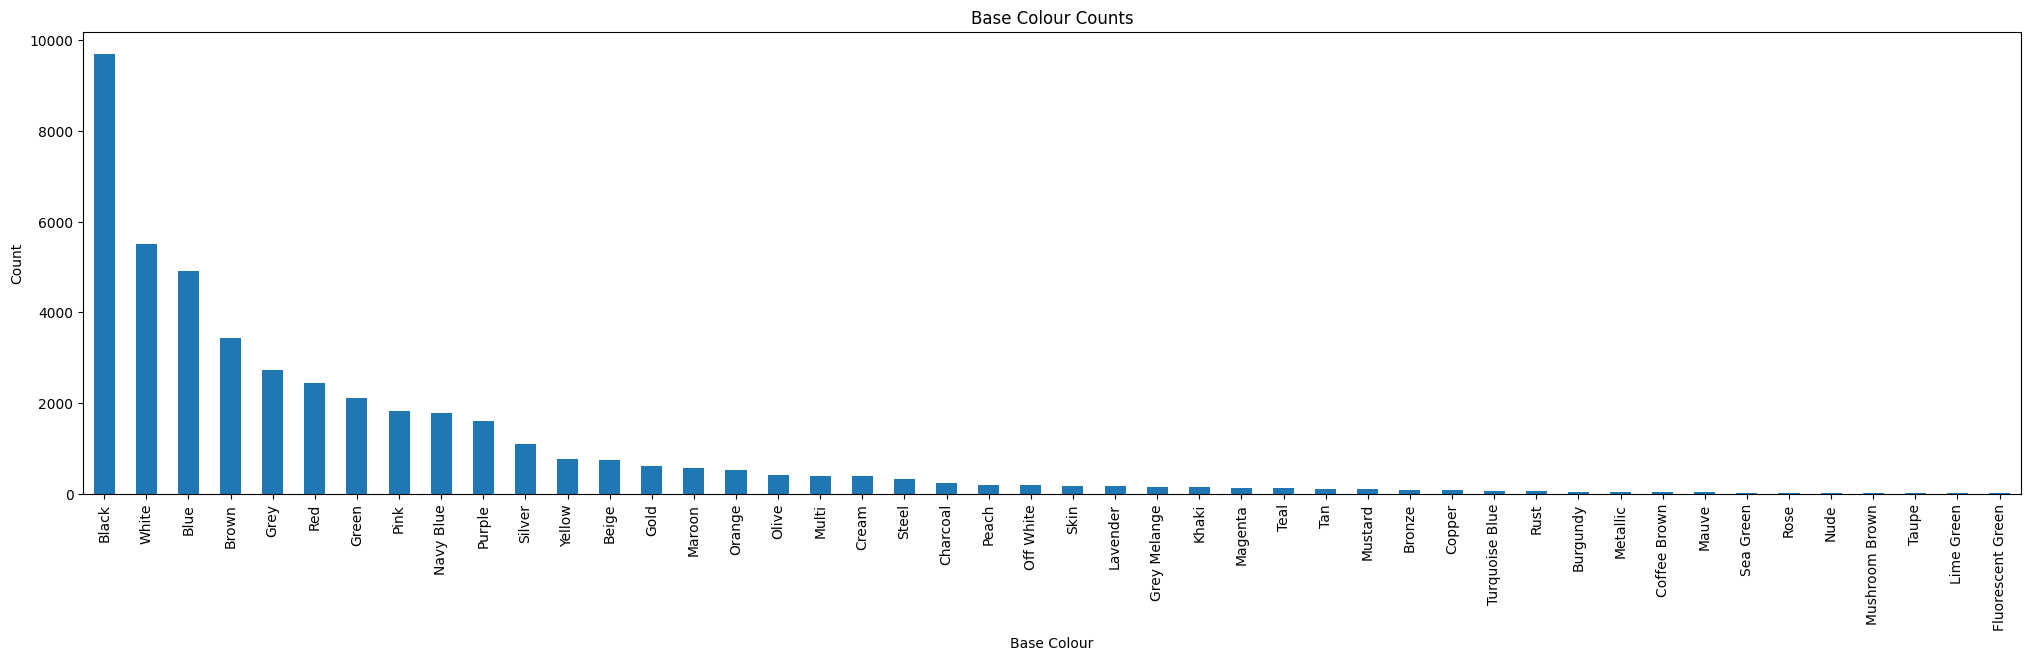

In [6]:
type_counts = df['baseColour'].value_counts()

plt.figure(figsize=(25, 6))
type_counts.plot(kind='bar')
plt.title('Base Colour Counts')
plt.xlabel('Base Colour')
plt.ylabel('Count')
plt.show()

In [7]:
value_counts = df['articleType'].value_counts()

indexes = value_counts.index

values = value_counts.values

for i in range(len(value_counts)):

    if values[i] <500:
        break

types_used = indexes[:i]

print('Article types used: ',types_used)


Article types used:  Index(['Tshirts', 'Shirts', 'Casual Shoes', 'Watches', 'Sports Shoes',
       'Kurtas', 'Tops', 'Handbags', 'Heels', 'Sunglasses', 'Wallets',
       'Flip Flops', 'Sandals', 'Briefs', 'Belts', 'Backpacks', 'Socks',
       'Formal Shoes', 'Perfume and Body Mist', 'Jeans', 'Shorts', 'Trousers',
       'Flats'],
      dtype='object', name='articleType')


In [8]:
value_counts = df['baseColour'].value_counts()

indexes = value_counts.index

values = value_counts.values

for i in range(len(value_counts)):

    if values[i] <500:
        break

colours_used = indexes[:i]
print('Base Colours used: ',colours_used)

Base Colours used:  Index(['Black', 'White', 'Blue', 'Brown', 'Grey', 'Red', 'Green', 'Pink',
       'Navy Blue', 'Purple', 'Silver', 'Yellow', 'Beige', 'Gold', 'Maroon',
       'Orange'],
      dtype='object', name='baseColour')


In [9]:
df = df[df['articleType'].isin(types_used)]
df = df[df['baseColour'].isin(colours_used)]

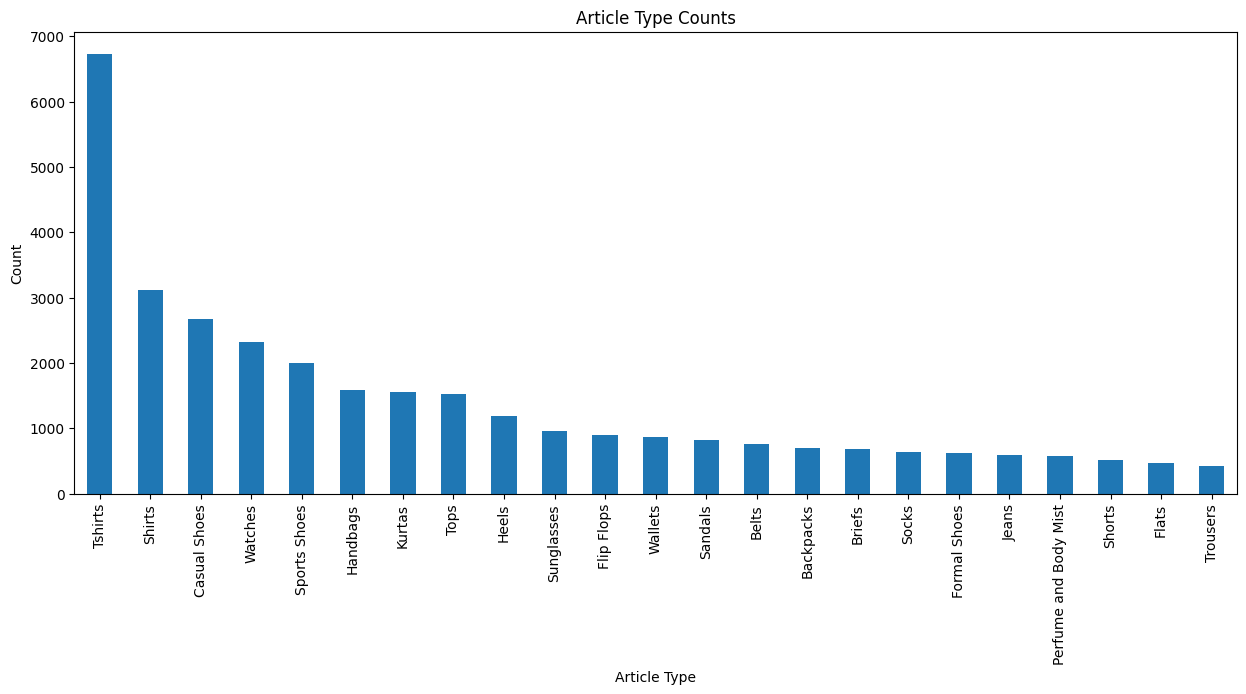

In [10]:
type_counts = df['articleType'].value_counts()


plt.figure(figsize=(15, 6))
type_counts.plot(kind='bar')
plt.title('Article Type Counts')
plt.xlabel('Article Type')
plt.ylabel('Count')
plt.show()

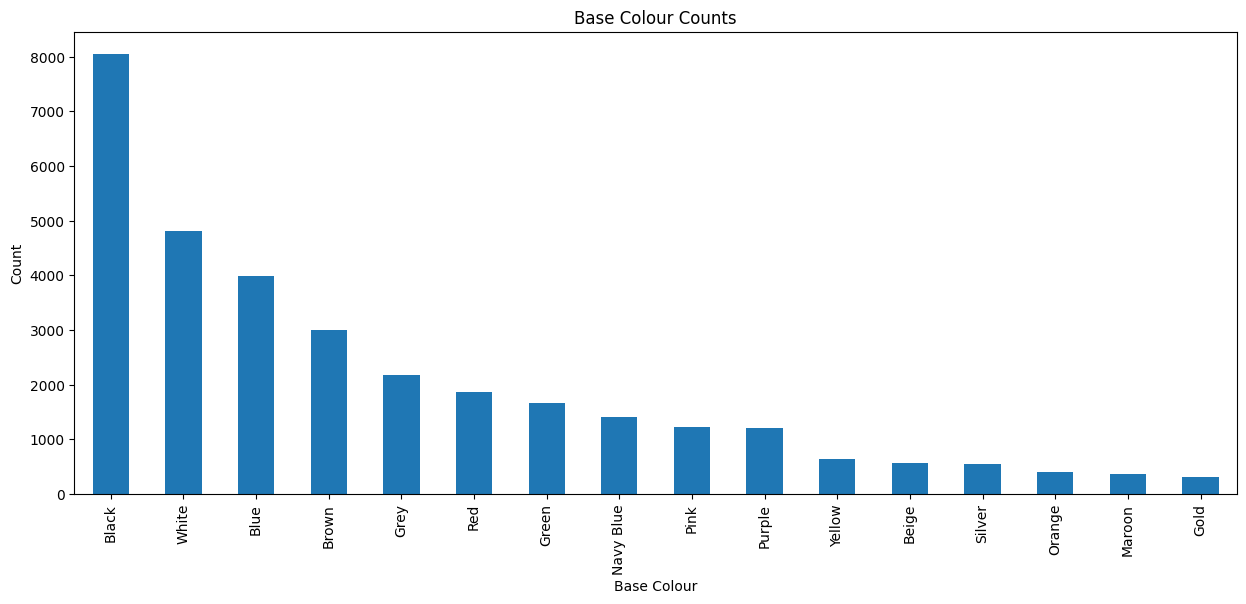

In [11]:
type_counts = df['baseColour'].value_counts()


plt.figure(figsize=(15, 6))
type_counts.plot(kind='bar')
plt.title('Base Colour Counts')
plt.xlabel('Base Colour')
plt.ylabel('Count')
plt.show()

In [12]:
len(df)

32244

In [13]:
data = []


from tensorflow.keras.preprocessing.image import img_to_array
import cv2

IX = 80
IY = 60

invalid_ids = []

for name in df.id:

    try:
        image = cv2.imread('/kaggle/input/fashion-product-images-small/images/'+str(name)+'.jpg')
        image = cv2.resize(image, (IX,IY) )
        image = img_to_array(image)
        data.append(image)        
    except: 
        invalid_ids.append(name)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[ WARN:0@39.087] global loadsave.cpp:248 findDecoder imread_('/kaggle/input/fashion-product-images-small/images/39403.jpg'): can't open/read file: check file path/integrity
[ WARN:0@170.600] global loadsave.cpp:248 findDecoder imread_('/kaggle/input/fashion-product-images-small/images/39401.jpg'): can't open/read file: check file path/integrity
[ WARN:0@190.719] global loadsave.cpp:248 findDecoder imread_('/kaggle/input/fashion-product-images-small/images/39425.jpg'): can't open/read file: check file path/integrity


In [14]:
print('invalid ids:')
print(invalid_ids)

invalid ids:
[39403, 39401, 39425]


In [15]:
labels = []

used_columns = ['articleType','baseColour']


for index, row in df.iterrows():

    if row['id'] in invalid_ids:
        continue

    tags = []

    for col in used_columns:
        tags.append(row[col])

    labels.append(tags)

In [16]:
type(labels)

list

In [17]:
import numpy as np


data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

print(labels)

[['Shirts' 'Navy Blue']
 ['Jeans' 'Blue']
 ['Watches' 'Silver']
 ...
 ['Tshirts' 'Blue']
 ['Perfume and Body Mist' 'Blue']
 ['Watches' 'Pink']]


In [18]:
from sklearn.preprocessing import MultiLabelBinarizer


mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(labels)

print(mlb.classes_)
print(labels[0])

['Backpacks' 'Beige' 'Belts' 'Black' 'Blue' 'Briefs' 'Brown'
 'Casual Shoes' 'Flats' 'Flip Flops' 'Formal Shoes' 'Gold' 'Green' 'Grey'
 'Handbags' 'Heels' 'Jeans' 'Kurtas' 'Maroon' 'Navy Blue' 'Orange'
 'Perfume and Body Mist' 'Pink' 'Purple' 'Red' 'Sandals' 'Shirts' 'Shorts'
 'Silver' 'Socks' 'Sports Shoes' 'Sunglasses' 'Tops' 'Trousers' 'Tshirts'
 'Wallets' 'Watches' 'White' 'Yellow']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0]


In [19]:
types_used

Index(['Tshirts', 'Shirts', 'Casual Shoes', 'Watches', 'Sports Shoes',
       'Kurtas', 'Tops', 'Handbags', 'Heels', 'Sunglasses', 'Wallets',
       'Flip Flops', 'Sandals', 'Briefs', 'Belts', 'Backpacks', 'Socks',
       'Formal Shoes', 'Perfume and Body Mist', 'Jeans', 'Shorts', 'Trousers',
       'Flats'],
      dtype='object', name='articleType')

In [20]:
colours_used

Index(['Black', 'White', 'Blue', 'Brown', 'Grey', 'Red', 'Green', 'Pink',
       'Navy Blue', 'Purple', 'Silver', 'Yellow', 'Beige', 'Gold', 'Maroon',
       'Orange'],
      dtype='object', name='baseColour')

In [21]:
from tensorflow.keras.layers import Flatten, Dropout, Dense, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential


inputShape = (IY, IX, 3)
 
model = Sequential()
 
model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

 
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.summary()

model.add(Flatten())
 
model.add(Dense(128))
model.add(Activation('relu'))
 
out = len(mlb.classes_)
model.add(Dense(out))
model.add(Activation('sigmoid'))

 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['mse'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 80, 32)        896       
                                                                 
 activation (Activation)     (None, 60, 80, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 40, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 30, 40, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 38, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 28, 38, 64)        0         
                                                        

In [22]:
from sklearn.model_selection import train_test_split


(trainX, testX, trainY, testY) = train_test_split(data,labels, test_size=0.2, random_state=42)

In [23]:
len(testX)

6449

In [24]:
len(trainX)

25792

In [25]:
batch = 32
E = 50

history = model.fit(x=trainX, y=trainY, epochs=E, verbose=1)

loss_values = history.history['loss']

Epoch 1/50


2023-12-17 18:55:19.175324: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


806/806 [==============================] - 16s 7ms/step - loss: 0.1248 - mse: 0.0337
Epoch 2/50
806/806 [==============================] - 6s 7ms/step - loss: 0.0826 - mse: 0.0231
Epoch 3/50
806/806 [==============================] - 6s 7ms/step - loss: 0.0733 - mse: 0.0206
Epoch 4/50
806/806 [==============================] - 6s 7ms/step - loss: 0.0682 - mse: 0.0192
Epoch 5/50
806/806 [==============================] - 6s 7ms/step - loss: 0.0652 - mse: 0.0184
Epoch 6/50
806/806 [==============================] - 6s 7ms/step - loss: 0.0627 - mse: 0.0177
Epoch 7/50
806/806 [==============================] - 6s 7ms/step - loss: 0.0611 - mse: 0.0172
Epoch 8/50
806/806 [==============================] - 6s 7ms/step - loss: 0.0598 - mse: 0.0169
Epoch 9/50
806/806 [==============================] - 6s 7ms/step - loss: 0.0585 - mse: 0.0166
Epoch 10/50
806/806 [==============================] - 6s 7ms/step - loss: 0.0575 - mse: 0.0163
Epoch 11/50
806/806 [==============================] - 6s 7

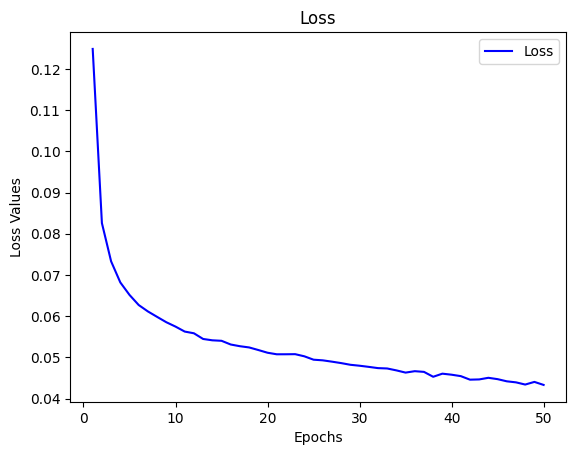

In [26]:
epochs = range(1, E + 1)


plt.plot(epochs, loss_values, 'b-', label='Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Values')
plt.legend()


plt.show()

In [27]:
preds = model.predict(testX)


pred_binarized = []

for pred in preds:
    vals = []
    for val in pred:
        if val > 0.5:
            vals.append(1)
        else:
            vals.append(0)
    pred_binarized.append(vals) 

pred_binarized = np.array(pred_binarized)   


true_test_labels = mlb.inverse_transform(testY)
pred_test_labels = mlb.inverse_transform(pred_binarized)

correct = 0
wrong = 0


for i in range(len(testY)):

    true_labels = list(true_test_labels[i])

    pred_labels = list(pred_test_labels[i])

    label1 = true_labels[0]
    label2 = true_labels[1]

    if label1 in pred_labels:
        correct+=1
    else:
        wrong+=1

    if label2 in pred_labels:
        correct+=1
    else:
        wrong+=1    



print('correct: ', correct)
print('missing/wrong: ', wrong)
print('Accuracy: ',correct/(correct+wrong))

202/202 [==============================] - 1s 3ms/step
correct:  9923
missing/wrong:  2975
Accuracy:  0.7693440843541635


In [33]:
for i in range(10):
    print('True labels: ',true_test_labels[i],' Predicted labels: ',pred_test_labels[i])

True labels:  ('Black', 'Sports Shoes')  Predicted labels:  ('Sports Shoes',)
True labels:  ('Kurtas', 'Orange')  Predicted labels:  ('Kurtas', 'Maroon', 'Red')
True labels:  ('Blue', 'Perfume and Body Mist')  Predicted labels:  ('Blue', 'Perfume and Body Mist')
True labels:  ('Black', 'Watches')  Predicted labels:  ('Black', 'Watches')
True labels:  ('Black', 'Wallets')  Predicted labels:  ('Black', 'Wallets')
True labels:  ('Black', 'Trousers')  Predicted labels:  ('Black', 'Navy Blue', 'Trousers')
True labels:  ('Black', 'Sunglasses')  Predicted labels:  ('Black', 'Sunglasses')
True labels:  ('Maroon', 'Shirts')  Predicted labels:  ('Maroon', 'Shirts')
True labels:  ('Briefs', 'Maroon')  Predicted labels:  ('Briefs',)
True labels:  ('Black', 'Watches')  Predicted labels:  ('Black', 'Watches')


In [29]:
fltd_pred_test_labels = []
fltd_true_test_labels = []
for i in range(len(true_test_labels)):
    if len(pred_test_labels[i]) == 2:
        fltd_pred_test_labels.append(pred_test_labels[i])
        fltd_true_test_labels.append(true_test_labels[i])

In [30]:
new_pred_test_labels = []
new_true_test_labels = []
for i in range(len(fltd_true_test_labels)):
    if fltd_pred_test_labels[i][0] in colours_used:
        new_pred_test_labels.append(fltd_pred_test_labels[i])
        new_true_test_labels.append(fltd_true_test_labels[i])
    else:
        test_tuple = (fltd_true_test_labels[i][1], fltd_true_test_labels[i][0])
        pred_tuple = (fltd_pred_test_labels[i][1], fltd_pred_test_labels[i][0])
        new_pred_test_labels.append(pred_tuple)
        new_true_test_labels.append(test_tuple)

In [34]:
for i in range(10):
    print('True labels: ',new_true_test_labels[i],' Predicted labels: ',new_pred_test_labels[i])

True labels:  ('Blue', 'Perfume and Body Mist')  Predicted labels:  ('Blue', 'Perfume and Body Mist')
True labels:  ('Black', 'Watches')  Predicted labels:  ('Black', 'Watches')
True labels:  ('Black', 'Wallets')  Predicted labels:  ('Black', 'Wallets')
True labels:  ('Black', 'Sunglasses')  Predicted labels:  ('Black', 'Sunglasses')
True labels:  ('Maroon', 'Shirts')  Predicted labels:  ('Maroon', 'Shirts')
True labels:  ('Black', 'Watches')  Predicted labels:  ('Black', 'Watches')
True labels:  ('Brown', 'Wallets')  Predicted labels:  ('Brown', 'Wallets')
True labels:  ('White', 'Tops')  Predicted labels:  ('White', 'Tops')
True labels:  ('Red', 'Tshirts')  Predicted labels:  ('Red', 'Tshirts')
True labels:  ('Brown', 'Belts')  Predicted labels:  ('Brown', 'Belts')


In [32]:

correct = 0
wrong = 0
 
 
for i in range(len(new_true_test_labels)):
 
    true_labels = list(new_true_test_labels[i])
 
    pred_labels = list(new_pred_test_labels[i])
 
    label1 = true_labels[0]
    label2 = true_labels[1]
 
    if label1 in pred_labels:
        correct+=1
    else:
        wrong+=1
 
    if label2 in pred_labels:
        correct+=1
    else:
        wrong+=1    
 
 
print('correct: ', correct)
print('missing/wrong: ', wrong)
print('Accuracy: ',correct/(correct+wrong))

correct:  8258
missing/wrong:  1402
Accuracy:  0.8548654244306418
